In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

root_pth = "/home/user/data/THU-timeseries"
# root_pth = "/mnt/ExtraDisk/wcx/research/THU-timeseries"
all_data_pth = [
    # "dataset/MFRED_clean.csv",
    # "ETT-small/ETTh1.csv",
    # "ETT-small/ETTh2.csv",
    # "ETT-small/ETTm1.csv",
    # "ETT-small/ETTm2.csv",
    # 'exchange_rate/exchange_rate.csv',
    # 'illness/national_illness.csv',
    'weather/weather.csv',
    # 'traffic/traffic.csv',
    # 'electricity/electricity.csv',
]
for data_pth in all_data_pth:
    df = pd.read_csv(os.path.join(root_pth, data_pth), index_col=0, parse_dates=True)
    n_timestep = len(df)
    num_train = int(n_timestep * 0.7)
    df['rh (%)'][:3840].plot()
    break
    # scaler = StandardScaler()
    # scaler.fit(df[:num_train])
    # df[df.columns] = scaler.transform(df)
    # df.index = pd.date_range('2019-01-01', periods=len(df), freq='5min')
        
    # df.to_csv(os.path.join(root_pth, 'MFRED_scaled.csv'))
    # long_df = []
    # for c in df.columns.tolist():
    #     temp_df = df[[c]].copy()
    #     temp_df['unique_id'] = c
    #     temp_df = temp_df.reset_index()
    #     temp_df = temp_df.rename(columns={c:'y','date':'ds'})
    #     if data_pth.__contains__('ETTh'):
    #         num_train = 12 * 30 * 24
    #         num_test = 4 * 30 * 24
    #         num_vali = 4 * 30 * 24
    #         temp_df = temp_df[:num_train+num_vali+num_test]
    #     elif data_pth.__contains__('ETTm'):
    #         num_train = 12 * 30 * 24 * 4
    #         num_test = 4 * 30 * 24 * 4
    #         num_vali = 4 * 30 * 24 * 4
    #         temp_df = temp_df[:num_train+num_vali+num_test]
    #     long_df.append(temp_df)
    # long_df = pd.concat(long_df)
    # long_df = long_df.reset_index(drop=True)
    # long_df.to_csv(os.path.join(root_pth, data_pth[:-4]+'_NF.csv'), index=False)
    # break

In [ ]:
import pandas as pd
from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
import logging
import os
import argparse
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from neuralforecast import NeuralForecast
from neuralforecast.models import (
    NHITS,
    DLinear,
    PatchTST,
    TimesNet,
    # iTransformer,
    # TFT,
    Autoformer,
    # FEDformer,
    # LSTM,
    # MLP,
    # NBEATSx,
    # DeepAR,
)
from neuralforecast.losses.numpy import mse, mae
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss
from neuralforecast.losses.numpy import mqloss, mse, mae
from src.utils.metrics import calculate_metrics, get_bench_metrics
import pickle

# Change this to your own data to try the model
print(LongHorizonInfo['ECL'].test_size)
Y_df, _, _ = LongHorizon.load(directory='/home/user/data/NF_longterm', group='ECL')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

# For this excercise we are going to take 960 timestamps as validation and test
n_time = len(Y_df.ds.unique())
num_train = int(n_time * 0.7)
num_test = int(n_time * 0.2)
print(num_test)
num_vali = n_time - num_train - num_test
# num_train = 12 * 30 * 24
# num_test = 4 * 30 * 24
# num_vali = 4 * 30 * 24
        
# val_size = 96*10
# test_size = 96*10

Y_df = Y_df[Y_df['unique_id'] == 'OT']


In [ ]:
y_true = Y_hat_df["y"].values.reshape(-1, pred_len, 1)
print(y_true.shape)
y_true[0][:10]

In [ ]:
# SAVE METRICS
ds = [
    "ETTh1",
    "ETTh2",
    "ETTm1",
    "ETTm2",
    "ECL",
    "Exchange",
    "TrafficL",
    "Weather",
]
pred_len = [96, 192, 336, 720]
save_dir = "/mnt/ExtraDisk/wcx/research/benchmarks"
all_df = []
for d in ds:
    ds_df = []
    for pl in pred_len:
        result_path = os.path.join(save_dir, f"{d}_96_{pl}_U","results.csv")
        df = pd.read_csv(result_path, index_col=0)
        df.index.name = 'model'
        df = df.reset_index()
        df = df.groupby('model').mean()
        df = df.drop(columns=['MAE', 'iter'])
        df = df.stack()
        df = pd.DataFrame(df, columns=[pl]).transpose()
        ds_df.append(df)
    ds_df = pd.concat(ds_df)
    ds_df.index.name = 'pred_len'
    ds_df['dataset'] = d
    ds_df = ds_df.reset_index()
    ds_df = ds_df.set_index(['dataset','pred_len'])
    all_df.append(ds_df)
all_df = pd.concat(all_df)
all_df.to_csv(os.path.join(save_dir, 'bench_result.csv'))
# print(all_df.to_latex(float_format="{:.3f}".format))

In [ ]:
import pandas as pd
from datasetsforecast.long_horizon import LongHorizon
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


ds = {
        "ETTh1": "ETTh1",
        "ETTh2": "ETTh2",
        "ETTm1": "ETTm1",
        "ETTm2": "ETTm2",
        "ECL": "electricity",
        "Exchange": "exchange_rate",
        "TrafficL": "traffic",
        "Weather": "weather",
        "MFRED": "mfred",
    }

for d in ds:
    print(d)
    if d=='Weather':
        data_dir_nf = '/mnt/ExtraDisk/wcx/research'
        dataset_nf = d
        data_dir_thu = '/mnt/ExtraDisk/wcx/research/THU-timeseries'
        dataset_thu = f"{'ETT-small' if ds[d].__contains__('ETT') else ds[d]}/{ds[d]}.csv"
        csv_thu = os.path.join(data_dir_thu, dataset_thu)
        
        # THU
        df_thu = pd.read_csv(csv_thu, index_col=0, parse_dates=True)[['OT']]
        if d.__contains__("ETTh"):
            num_train = 12 * 30 * 24
            # num_test = 4 * 30 * 24
            # num_vali = 4 * 30 * 24
        elif d.__contains__("ETTm"):
            num_train = 12 * 30 * 24 * 4
            # num_test = 4 * 30 * 24 * 4
            # num_vali = 4 * 30 * 24 * 4
        else:
            num_train = int(len(df_thu) * 0.7)
            # num_test = int(len(Y_df) * 0.2)
            # num_vali = len(Y_df) - num_train - num_test
        scaler = StandardScaler()
        scaler.fit(df_thu.values[:num_train])
        df_thu_value = scaler.transform(df_thu.values)
        
            
        # NF
        Y_df, _, _ = LongHorizon.load(directory=data_dir_nf, group=dataset_nf)
        Y_df["ds"] = pd.to_datetime(Y_df["ds"])
        df_nf = Y_df[Y_df["unique_id"] == "OT"]
        df_nf = df_nf.drop(columns=['unique_id'])
        df_nf = df_nf.set_index('ds')
        
        if df_thu_value.shape != df_nf.values.shape:
            print("shape is not the same")
            print(f'{d}')
            print(df_thu_value.shape)
            print(df_nf.values.shape)
            max_len = min(len(df_thu_value), len(df_nf.values))
        else:
            max_len = len(df_thu_value)
        
        close = np.allclose(df_thu_value.flatten()[:max_len], df_nf.values.flatten()[:max_len])
        close = np.allclose(df_thu_value.flatten()[-10000:], df_nf.values.flatten()[-10000:])
        print(close)
        if not close:
            # plt.plot(df_thu_value.flatten()[-10000:])
            # plt.plot(df_nf.values.flatten()[-10000:])
            plt.scatter(df_thu_value.flatten()[-10000:], df_nf.values.flatten()[-10000:])
        print('----'*10)
    # fig, ax = plt.subplots()
    # ax.scatter(df_thu_value.flatten()[:max_len], df_nf.values.flatten()[:max_len])
    
    
    



In [ ]:
import pandas as pd
from datasetsforecast.long_horizon import LongHorizon
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from neuralforecast.losses.numpy import mse, mqloss

# # SAVE METRICS
ds = [
    "ETTh1",
    "ETTh2",
    "ETTm1",
    "ETTm2",
    "ECL",
    "Exchange",
    "TrafficL",
    "Weather",
]
quantiles = [0.05 * i for i in range(19)]
# pred_len = [336]
pred_len = [96, 192, 336, 720]
save_dir = "/mnt/ExtraDisk/wcx/research/benchmarks"
all_df = []
for d in ds:
    # if d != 'TrafficL':
    #     continue
    ds_df = []
    for pl in pred_len:
        label_path = os.path.join(save_dir, f"{d}_96_{pl}_U", "true.npy")
        pred_path = os.path.join(save_dir, f"{d}_96_{pl}_U", "pred_PatchTST_0.npy")
        y_true = np.load(label_path)
        y_pred = np.load(pred_path)
        y_true_fft = np.fft.rfft(y_true[0].flatten(), norm="ortho")
        y_true_fft[0] = 0
        y_tr_fft_abs = np.abs(y_true_fft)
        theta = np.arctan2(y_true_fft.imag, y_true_fft.real)
        phi_r_int = np.where(
            np.isinf(y_tr_fft_abs),
            np.ones_like(y_tr_fft_abs),
            ((y_tr_fft_abs - 1) / (y_tr_fft_abs + 1)),
        )
        phi = np.arcsin(phi_r_int)
        # print(theta[0])
        print(theta[-1])
        # y_true = y_true[::pl].flatten()
        fig, ax = plt.subplots()
        ax.plot(theta)
        # ax.plot(y_pred[333, ..., 9].flatten())

        ax.set_title(d)
        # plt.plot(y_true[126].flatten())
        # plt.plot(y_pred[126, ..., 9].flatten())
        break
    # break
#         df.index.name = 'model'
#         df = df.reset_index()
#         df = df.groupby('model').mean()
#         df = df.drop(columns=['MAE', 'iter'])
#         df = df.stack()
#         df = pd.DataFrame(df, columns=[pl]).transpose()
#         ds_df.append(df)
#     ds_df = pd.concat(ds_df)
#     ds_df.index.name = 'pred_len'
#     ds_df['dataset'] = d
#     ds_df = ds_df.reset_index()
#     ds_df = ds_df.set_index(['dataset','pred_len'])
#     all_df.append(ds_df)
# all_df = pd.concat(all_df)
# all_df.to_csv(os.path.join(save_dir, 'bench_result.csv'))
# print(all_df.to_latex(float_format="{:.3f}".format))

ETTh1 96
ETTh2 96
ETTm1 96
ETTm2 96
ECL 96
Exchange 96
TrafficL 96


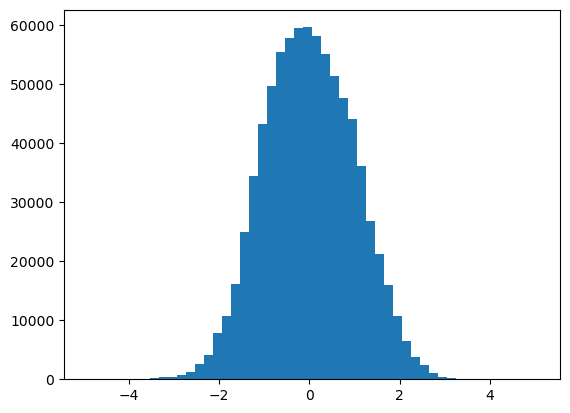

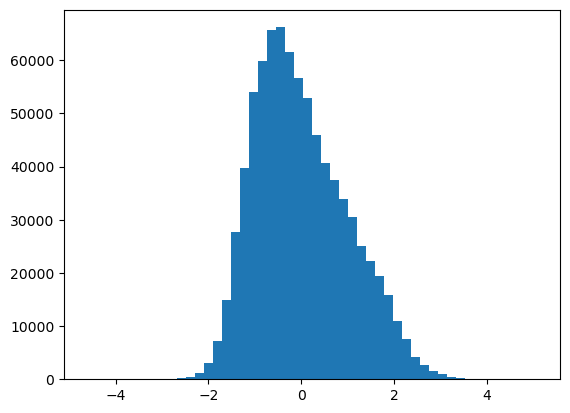

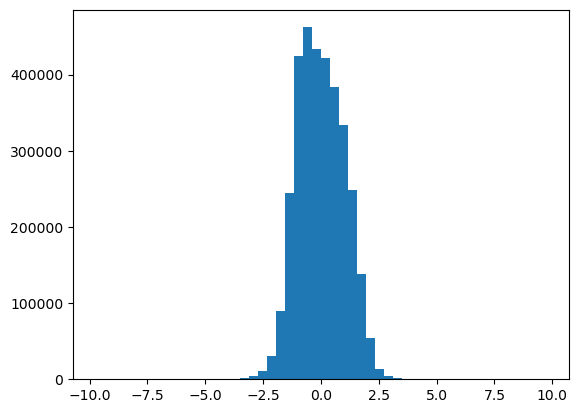

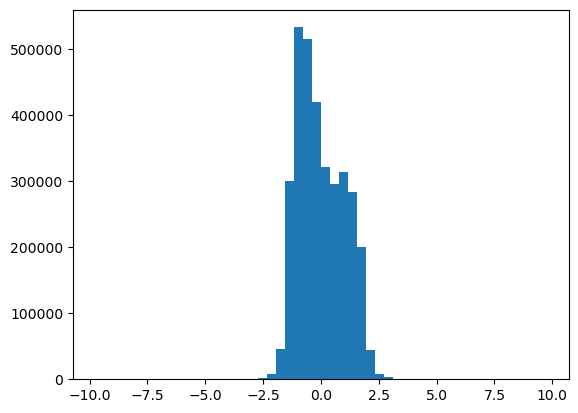

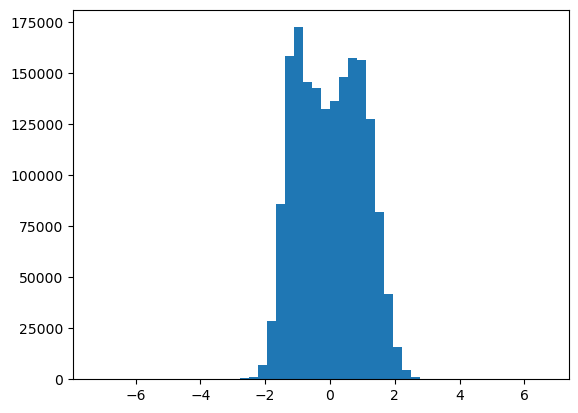

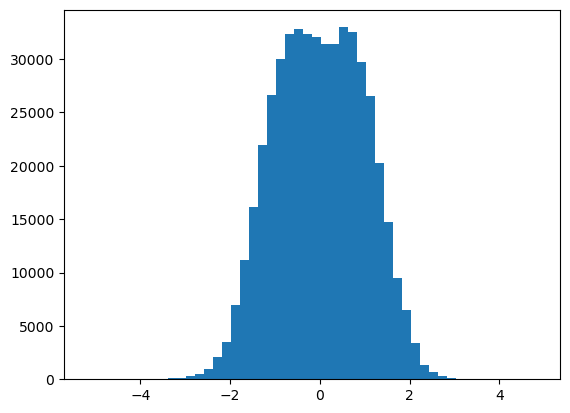

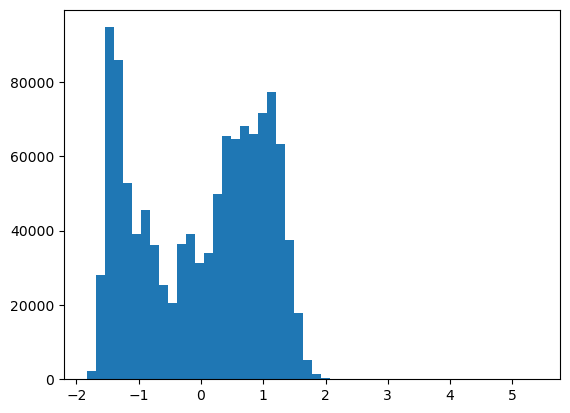

In [5]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor

ds = {
    "ETTh1": "etth1",
    "ETTh2": "etth2",
    "ETTm1": "ettm1",
    "ETTm2": "ettm2",
    "ECL": "electricity",
    "Exchange": "exchange_rate",
    "TrafficL": "traffic",
    # "Weather": "weather",
    # "MFRED": "mfred",
}
# pred_len = [288, 432, 576]
pred_len = [96]
# pred_len = [96, 192, 336, 720]
save_dir = "/home/user/data/FrequencyDiffusion/savings"
save_dir_bench = "/home/user/data/NF_benchmark"
# save_dir = "/mnt/ExtraDisk/wcx/research/FrequencyDiffusion/savings"
all_df = []

for d in ds:
    real_d = ds[d]
    ds_df = []
    for pl in pred_len:
        print(d, pl)
        result_path = os.path.join(save_dir, f"{real_d}_{pl}_S", "train_dl.pt")
        train_dl = torch.load(result_path)
        y_real = []
        x = []
        for b in train_dl:
            x.append(b["observed_data"].cpu().numpy())
            y_real.append(b["future_data"].cpu().numpy())
        y_real = np.concatenate(y_real)
        x = np.concatenate(x)
        x_mean = x.mean(axis=1).squeeze()
        y_mean = y_real.mean(axis=1).squeeze()
        
        fig, ax = plt.subplots()
        ax.hist(((x - x.mean(axis=1, keepdims=True))/x.std(axis=1, keepdims=True)).flatten(), bins=50)
        # quantiles = [0.025, 0.05, 0.1, 0.9, 0.95, 0.975]
        # # quantiles = [0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.95, 0.975]
        # for q in quantiles:
        #     reg = QuantileRegressor(quantile=q, alpha=0)
        #     reg.fit(x_mean.reshape(-1, 1), y_mean.reshape(-1, 1))
        #     y_mean_q = reg.predict(x_mean.reshape(-1, 1)).flatten()
        #     ax.plot(x_mean, y_mean_q, label=q)
        # ax.legend()
            


        # result_path = os.path.join(save_dir, f"{real_d}_{pl}_S", "test_dl.pt")
        # train_dl = torch.load(result_path)
        # y_real = []
        # x = []
        # for b in train_dl:
        #     x.append(b["observed_data"].cpu().numpy())
        #     y_real.append(b["future_data"].cpu().numpy())
        # y_real = np.concatenate(y_real)
        # x = np.concatenate(x)
        # x_mean = x.mean(axis=1).squeeze()
        # y_mean = y_real.mean(axis=1).squeeze()
        # ax.scatter(x_mean, y_mean)

    #     x_norm = (x - x.mean(axis=1, keepdims=True))/x.std(axis=1, keepdims=True)
    #     y_real_norm = (y_real - x.mean(axis=1, keepdims=True))/x.std(axis=1, keepdims=True)

    #     fig, axs = plt.subplots(3,3)
    #     axs = axs.flatten()
    #     choose = np.random.randint(0, len(x), size=len(axs))
    #     for i in range(len(axs)):
    #         # axs[i].plot(range(0, x.shape[1]), x[choose[i], :, 0])
    #         # axs[i].plot(range(0, x.shape[1]), np.mean(x[choose[i], :, 0], axis=0, keepdims=True).repeat(x.shape[1]), ls='--', c='grey')
    #         # axs[i].plot(range(x.shape[1], x.shape[1]+y_real.shape[1]), y_real[choose[i], :, 0])
    #         # axs[i].plot(range(x.shape[1], x.shape[1]+y_real.shape[1]), np.mean(y_real[choose[i], :, 0], axis=0, keepdims=True).repeat(y_real.shape[1]), ls='--', c='grey')

    #         axs[i].plot(range(0, x_norm.shape[1]), x_norm[choose[i], :, 0])
    #         axs[i].plot(range(0, x_norm.shape[1]), np.mean(x_norm[choose[i], :, 0], axis=0, keepdims=True).repeat(x.shape[1]), ls='--', c='grey')
    #         axs[i].plot(range(x.shape[1], x.shape[1]+y_real.shape[1]), y_real_norm[choose[i], :, 0])
    #         axs[i].plot(range(x.shape[1], x.shape[1]+y_real.shape[1]), np.mean(y_real_norm[choose[i], :, 0], axis=0, keepdims=True).repeat(y_real_norm.shape[1]), ls='--', c='grey')
    #     # fig.suptitle(f'{d}-96-{pl}')
    #     fig.tight_layout()
    #     break
    # break
    # fig.savefig(f'../assets/{d}-96-{pl}.png')

    # bench_path = os.path.join(save_dir_bench, f"{d}_96_{pl}_S", "true.npy")
    # y_real_bench = np.load(bench_path)
    # print(np.allclose(y_real, y_real_bench))
    # # assert np.allclose(y_real, y_real_bench)

In [ ]:
import numpy as np
import pandas as pd
from gluonts.dataset.repository import get_dataset

df = pd.read_csv('/home/user/data/THU-timeseries/nordpool/Elspotprices.csv', index_col=0, parse_dates=True)
df = df[['SpotPriceEUR']]
# df = df.
# df = df.drop(columns='id')
# df['time'] = pd.to_datetime(df['time'])
# df = df.groupby('time').sum(numeric_only=True)

# df[:24*20].plot()
# for ii, temp_df in df.groupby('station_id'):
#     temp_df = temp_df.dropna(axis=1, how='all')
#     temp_df = temp_df.interpolate()
#     temp_df[:24*7].plot()
#     break
    